## Correlation

Correlation Feature Selection evaluates subsets of features on the basis of the following hypothesis: "Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other".

**References**:

M. Hall 1999, [Correlation-based Feature Selection for Machine Learning](http://www.cs.waikato.ac.nz/~mhall/thesis.pdf)

Senliol, Baris, et al. "Fast Correlation Based Filter (FCBF) with a different search strategy." Computer and Information Sciences.


I will demonstrate how to select features based on correlation using 2 procedures:

The first one is a brute force function that finds correlated features without any further insight. 

The second procedure finds groups of correlated features, which we can then explore to decide which one we keep and which ones we discard.

Often, more than 2 features are correlated with each other. We can find groups of 3, 4 or more features that are correlated. By identifying these groups, with procedure 2, we can then select from each group, which feature we want to keep, and which ones we want to remove.

**Note**

The most used method to determine correlation is the Pearson's correlation method, which is the one that I will carry out in this notebook.

In [106]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import sys
 
# setting path
sys.path.append('..')
 
# importing
from helper_fe_v2 import get_full_datapath_nm
 

In [110]:
def read_df_from_file ( csv_fnm, set_nrows, nrws ) :

    fnm, exists = get_full_datapath_nm (os.getenv('KPROJDIR'), "input_data", csv_fnm) 

    # load our first dataset

    if set_nrows :
        data = pd.read_csv(fnm, nrows=nrws)
    else :
        data = pd.read_csv(fnm)
    
    return data

In [112]:
data = read_df_from_file ( "fselect_dataset_2.csv", set_nrows=False, nrws=0 ) 
data.shape

Full path NM exists  C:\Users\Arindam Banerji\CopyFolder\IOT_thoughts\python-projects\kaggle_experiments\input_data\fselect_dataset_2.csv


(50000, 109)

In [67]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In practice, feature selection should be done after data pre-processing, so ideally, all the categorical variables are encoded into numbers, and then you can asses whether they are correlated with other features.

This dataset, for simplicity, contains only numerical variables.

In [68]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

## Correlation heatmap

<AxesSubplot:>

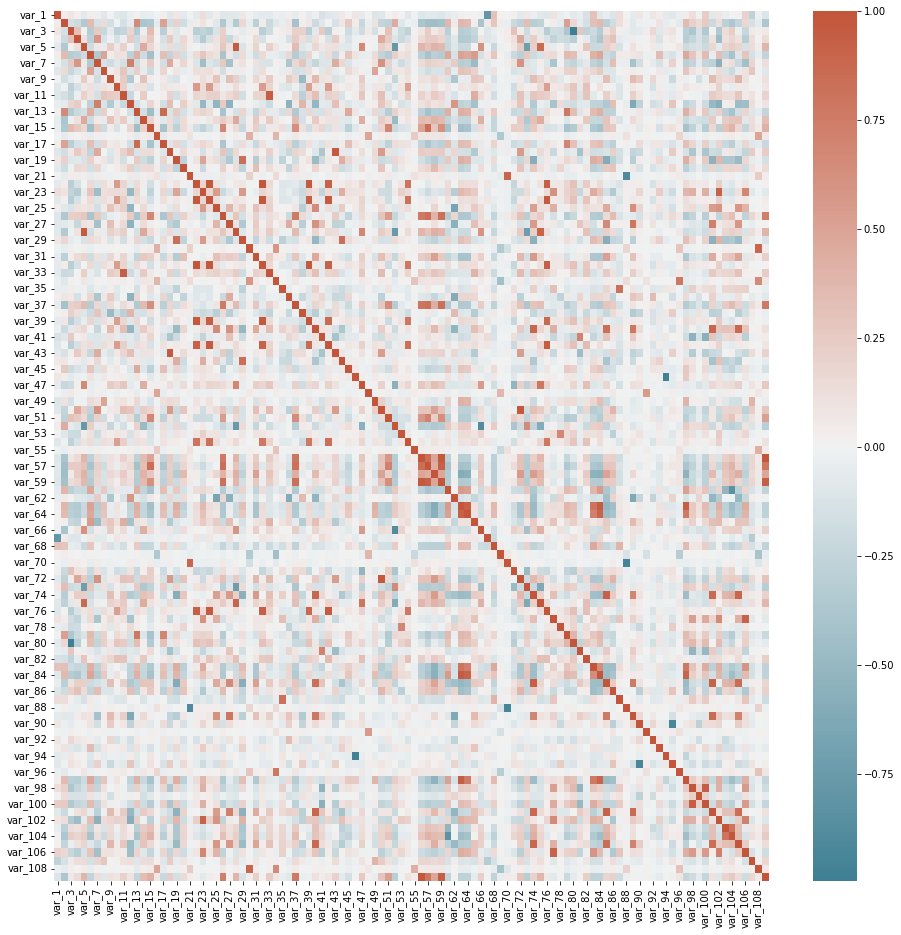

In [69]:
# visualise correlated features:

# I will build a correlation matrix, which examines the 
# correlation of all features (that is, for all possible feature combinations)
# and then visualise the correlation matrix using a heatmap

# the default correlation method of pandas.corr is pearson
# I include it anyways for the demo
corrmat = X_train.corr(method='pearson')

# we can make a heatmap with the package seaborn
# and customise the colours of searborn's heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# some more parameters for the figure
fig, ax = plt.subplots()
fig.set_size_inches(16,16)

# and now plot the correlation matrix
sns.heatmap(corrmat, cmap=cmap)

In the plot above, the dark orange squares correspond to highly correlated features (>0.8). Darker blue squares corresponds to negatively correlated features (<-0.8).

The diagonal represents the correlation of a feature with itself, therefore the value is 1.

We can see that there are a few features that are highly correlated.

In [70]:
print (os.getenv('KPROJDIR'))

C:\Users\Arindam Banerji\CopyFolder\IOT_thoughts\python-projects\kaggle_experiments


## Correlation scatterplots

In [71]:
# Looking at the heatmap, we see that var25 is highly correlated 
# with others in the dataset

# with this code we can get the other variable names
# and also print the correlation coefficient between var25 and 
# these variables:

c = 0

# iterate over each correlation value for var_5:
for i in corrmat.loc['var_5']:
    
    # if highly correlated
    if i>0.80:
        
        # print the variable name and the correlation coefficient
        print(corrmat.columns[c], i)
        
    c = c +1

var_5 1.0
var_28 0.9536721652384935
var_75 0.8616179292025201


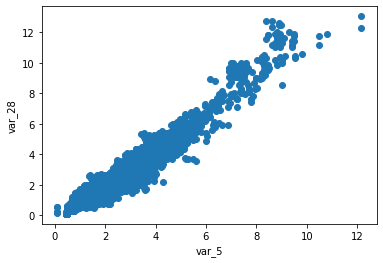

In [72]:
# now, let's plot the variables

plt.scatter(X_train['var_5'], X_train['var_28'])
plt.ylabel('var_28')
plt.xlabel('var_5')
plt.show()

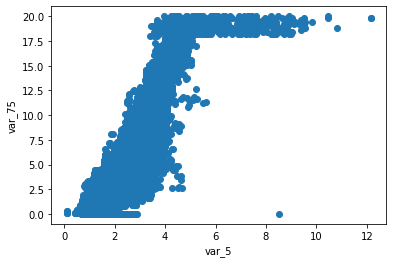

In [73]:
# now, let's plot the variables

plt.scatter(X_train['var_5'], X_train['var_75'])
plt.ylabel('var_75')
plt.xlabel('var_5')
plt.show()

We see that the correlation of the second pair of variables is not quite linear.

Next, let's identify a couple of negatively correlated variables:

In [74]:
c = 0
for i in corrmat.loc['var_88']:
    
    # if highly and negatively correlated
    if i<-0.8:
        
        # print the variable name and the correlation coefficient
        print(corrmat.columns[c], i)
        
    c = c +1

var_21 -0.8943929785046758
var_70 -0.9489465365954278


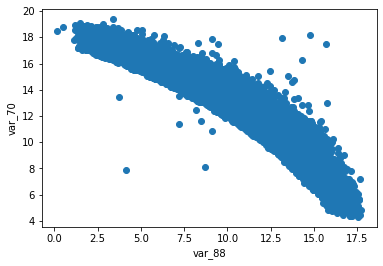

In [75]:
# now, let's plot the variables

plt.scatter(X_train['var_88'], X_train['var_70'])
plt.ylabel('var_70')
plt.xlabel('var_88')
plt.show()

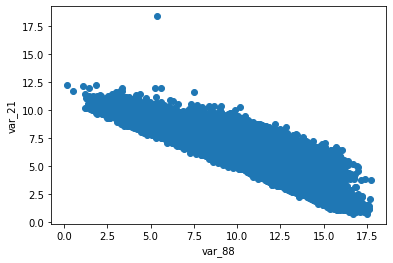

In [76]:
plt.scatter(X_train['var_88'], X_train['var_21'])
plt.ylabel('var_21')
plt.xlabel('var_88')
plt.show()

The higher the value of 1 variable, the lower the value of the other variable.

Now let's proceed with feature selection

## Remove correlated

### Brute force approach

In [77]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any further insight.

def correlation(dataset, threshold):
    
    # create a set where I will store the names of correlated columns
    col_corr = set()
    
    # create the correlation matrix
    corr_matrix = dataset.corr()
    
    # for each feature in the dataset (columns of the correlation matrix)
    for i in range(len(corr_matrix.columns)):
        
        # check with other features
        for j in range(i):
            
            # if the correlation is higher than a certain threshold
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                
                # print correlation, and variables examined
                # keep in mind that the columns and rows of the dataframe are identical
                # so we can identify the features being examned by looking for i,j
                # in the column names
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                
                # get the name of the correlated feature
                colname = corr_matrix.columns[j]
                
                # and add it to our correlated set
                col_corr.add(colname)
                
    return col_corr

**Note**, if the code in cell 50 is hard to understand, either run the code line by line (you would have to manually enter some of the values of i), or add print statements within the loop to print the intermediate outputs.

In [78]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

0.8632980418993791 var_17 var_13
0.9813409653986921 var_24 var_22
0.9536721652384935 var_28 var_5
0.8341792843814466 var_29 var_19
0.990430734999363 var_32 var_22
0.9804113632495293 var_32 var_24
0.9443605986205844 var_33 var_11
0.9744609333741678 var_39 var_22
0.9431153866790611 var_39 var_24
0.9748779191363224 var_39 var_32
0.91910579117498 var_42 var_22
0.9672922649953389 var_42 var_24
0.9199183443060952 var_42 var_32
0.8567453370818933 var_42 var_39
0.9654741987814475 var_43 var_18
0.8358214281472581 var_44 var_29
0.8150241475398633 var_54 var_24
0.8287090109274785 var_54 var_42
0.837404481636077 var_57 var_15
0.8318090759398273 var_57 var_26
0.8207993837973238 var_57 var_37
0.8440857367712562 var_57 var_56
0.8131947525226287 var_59 var_26
0.8306144274586774 var_59 var_37
0.9757443944210573 var_59 var_56
0.9223172758595293 var_59 var_57
0.9244600573582408 var_64 var_63
0.8925221926487203 var_66 var_52
0.895397163737887 var_70 var_21
0.9702627369945973 var_72 var_50
0.88311916559035

40

## Basic methods plus correlation pipeline

In this notebook, we will select features using a combination of constant, quasi-constant, and correlation methods. Finally, we will compare the performance of machine learning models built with the different feature subsets.

### Putting it all together

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

In [114]:
data = read_df_from_file ( "fselect_dataset_1.csv", set_nrows=False, nrws=0 ) 

data.shape

Full path NM exists  C:\Users\Arindam Banerji\CopyFolder\IOT_thoughts\python-projects\kaggle_experiments\input_data\fselect_dataset_1.csv


(50000, 301)

In [81]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [82]:
# I keep a copy of the dataset with all the variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [83]:
# remove constant features
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]

X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 266), (15000, 266))

In [84]:
# remove quasi-constant features - could also be used for const. features
sel = VarianceThreshold(
    threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_train)  # fit finds the features with low variance

sum(sel.get_support()) # how many not quasi-constant?

215

In [85]:
features_to_keep = X_train.columns[sel.get_support()]

In [86]:
# we can then remove the features like this
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 215), (15000, 215))

In [87]:
# sklearn transformations lead to numpy arrays
# here I transform the arrays back to dataframes
# please be mindful of getting the columns assigned
# correctly

X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep

X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

In [88]:
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210


10

In [89]:
# remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 205), (15000, 205))

In [90]:
# I keep a copy of the dataset except constant and duplicated variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

### Remove correlated features

In [92]:
# find and remove correlated features

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
    
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  93


In [93]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 112), (15000, 112))

In [94]:
# create a function to build random forests and compare performance in train and test set

def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [95]:
# original dataset (all variables)
run_randomForests(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.807612232524249
Test set
Random Forests roc-auc: 0.7868832427636059


In [96]:
# filter methods - basic
run_randomForests(X_train_basic_filter,
                  X_test_basic_filter,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.810290026780428
Test set
Random Forests roc-auc: 0.7914020645941601


In [97]:
# filter methods - correlation
run_randomForests(X_train,
                  X_test,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8066004772684517
Test set
Random Forests roc-auc: 0.7859521124929707


In [98]:
# create a function to build logistic regression and compare performance in train and test set

def run_logistic(X_train, X_test, y_train, y_test):
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44, max_iter=500)
    logit.fit(X_train, y_train)
    print('Train set')
    pred = logit.predict_proba(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = logit.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [99]:
# original
# for logistic regression features need to be in the same scale

# original
scaler = StandardScaler().fit(X_train_original)

run_logistic(scaler.transform(X_train_original),
             scaler.transform(X_test_original), y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8028290544821253
Test set
Logistic Regression roc-auc: 0.795107708741321


In [100]:
# filter methods - basic
scaler = StandardScaler().fit(X_train_basic_filter)

run_logistic(scaler.transform(X_train_basic_filter),
             scaler.transform(X_test_basic_filter),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8022717196742084
Test set
Logistic Regression roc-auc: 0.794739778054715


In [101]:
# filter methods - correlation
scaler = StandardScaler().fit(X_train)

run_logistic(scaler.transform(X_train),
             scaler.transform(X_test),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7942729298770534
Test set
Logistic Regression roc-auc: 0.7881886337111546


Similarly, for logistic regression, removing constant, quasi-constant, duplicated and highly correlated features, did not affect dramatically the performance of the algorithm.


## Correlation with Feature-engine

- The DropCorrelatedFeatures class from Feature-engine does a similar job to the brute force approach that we described earlier.

- The SmartCorrelationSelection allows us to select a feature from each correlated group based on model performance, number of missing values, cardinality or variance.

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate

from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection

# setting path
sys.path.append('..')
 
# importing
from helper_fe_v2 import get_full_datapath_nm


In [115]:
data = read_df_from_file ( "fselect_dataset_2.csv", set_nrows=True, nrws=50000 ) 
data.shape

Full path NM exists  C:\Users\Arindam Banerji\CopyFolder\IOT_thoughts\python-projects\kaggle_experiments\input_data\fselect_dataset_2.csv


(50000, 109)

In [116]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [117]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [118]:
# set up the selector

sel = DropCorrelatedFeatures(
    threshold=0.8,
    method='pearson',
    missing_values='ignore'
)


# find correlated features

sel.fit(X_train)

DropCorrelatedFeatures()

In [119]:
# each set contains a group of correlated features

sel.correlated_feature_sets_

[{'var_3', 'var_80'},
 {'var_28', 'var_5', 'var_75'},
 {'var_11', 'var_33'},
 {'var_13', 'var_17'},
 {'var_15', 'var_57'},
 {'var_18', 'var_43'},
 {'var_19', 'var_29'},
 {'var_21', 'var_70', 'var_88'},
 {'var_22', 'var_24', 'var_32', 'var_39', 'var_42', 'var_76'},
 {'var_102', 'var_23'},
 {'var_26', 'var_59'},
 {'var_108', 'var_30'},
 {'var_35', 'var_87'},
 {'var_101', 'var_105', 'var_40', 'var_74', 'var_85'},
 {'var_46', 'var_94'},
 {'var_50', 'var_72'},
 {'var_52', 'var_66'},
 {'var_109', 'var_56'},
 {'var_104', 'var_60'},
 {'var_63', 'var_64', 'var_84', 'var_97'},
 {'var_106', 'var_77'},
 {'var_90', 'var_95'},
 {'var_100', 'var_98'}]

In [120]:
# the transformer selects 1 feature from each group.
# the rest will be removed and can be found in this attribute

len(sel.features_to_drop_)

34

In [121]:
# drop correlated features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 74), (15000, 74))

## SmartCorrelationSelection

### Model Performance

We will keep a feature from each correlation group based on the performance of a random forest.

In [122]:
# separate train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)


In [123]:
# random forest
rf = RandomForestClassifier(
    n_estimators=10,
    random_state=20,
    n_jobs=4,
)

# correlation selector
sel = SmartCorrelatedSelection(
    variables=None, # if none, selector examines all numerical variables
    method="pearson",
    threshold=0.8,
    missing_values="raise",
    selection_method="model_performance",
    estimator=rf,
    scoring="roc_auc",
    cv=3,
)

# this may take a while, because we are training
# a random forest per correlation group

sel.fit(X_train, y_train)

SmartCorrelatedSelection(estimator=RandomForestClassifier(n_estimators=10,
                                                          n_jobs=4,
                                                          random_state=20),
                         missing_values='raise',
                         selection_method='model_performance')

In [124]:
# groups of correlated features

sel.correlated_feature_sets_

[{'var_3', 'var_80'},
 {'var_28', 'var_5', 'var_75'},
 {'var_11', 'var_33'},
 {'var_13', 'var_17'},
 {'var_15', 'var_57'},
 {'var_18', 'var_43'},
 {'var_19', 'var_29'},
 {'var_21', 'var_70', 'var_88'},
 {'var_22', 'var_24', 'var_32', 'var_39', 'var_42', 'var_76'},
 {'var_102', 'var_23'},
 {'var_26', 'var_59'},
 {'var_108', 'var_30'},
 {'var_35', 'var_87'},
 {'var_101', 'var_105', 'var_40', 'var_74', 'var_85'},
 {'var_46', 'var_94'},
 {'var_50', 'var_72'},
 {'var_52', 'var_66'},
 {'var_109', 'var_56'},
 {'var_104', 'var_60'},
 {'var_63', 'var_64', 'var_84', 'var_97'},
 {'var_106', 'var_77'},
 {'var_90', 'var_95'},
 {'var_100', 'var_98'}]

In [125]:
# lets examine the performace of a random forest based on
# each feature from the second group, to understand
# what the transformer is doing

# select second group of correlated features
group = sel.correlated_feature_sets_[1]

# build random forest with cross validation for
# each feature

for f in group:
    
    model = cross_validate(
        rf,
        X_train[f].to_frame(),
        y_train,
        cv=3,
        return_estimator=False,
        scoring='roc_auc',
    )

    print(f, model["test_score"].mean())

var_28 0.5066021173653567
var_5 0.4997792776258437
var_75 0.5013606312589597


The best performing feature is var_28, so that one should be retained. The other 2 can be found in the attribute features_to_drop_

In [126]:
# retained

'var_28' in sel.features_to_drop_

False

In [127]:
# dropped

'var_5' in sel.features_to_drop_

True

In [128]:
# dropped

'var_75' in sel.features_to_drop_

True

### Variance

Alternatively, we can select the feature with the highest variance from each group.

In [129]:
# correlation selector

sel = SmartCorrelatedSelection(
    variables=None,
    method="pearson",
    threshold=0.8,
    missing_values="raise",
    selection_method="variance",
    estimator=None,
    scoring="roc_auc",
    cv=3,
)

sel.fit(X_train, y_train)

SmartCorrelatedSelection(missing_values='raise', selection_method='variance')

In [130]:
# let's examine the variance of the features from the second group of
# correlated ones

group = sel.correlated_feature_sets_[1]

X_train[group].std()

C:\Users\Arindam Banerji\AppData\Local\Temp\ipykernel_4552\212900620.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train[group].std()


var_28    1.024728
var_5     0.875302
var_75    3.539938
dtype: float64

In [131]:
'var_28' in sel.features_to_drop_

True

In [132]:
'var_5' in sel.features_to_drop_

True

In [133]:
'var_75' in sel.features_to_drop_

False

Go ahead and try removing by cardinality, which uses the number of unique values of each variable, and then compare the result with pandas nunique().

After this, pick another dataset with missing values, and try the method "missing_values".

## Basic methods plus correlation pipeline with Feature-engine

In this notebook, we will apply basic methods to remove constant, quasi-constant and duplicated features, followed up by removing correlated features, in 1 single step, using Feature-engine and the Scikit-learn Pipeline.

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline

from feature_engine.selection import (
    DropConstantFeatures,
    DropDuplicateFeatures,
    SmartCorrelatedSelection,
)

# setting path
sys.path.append('..')
# importing
from helper_fe_v2 import get_full_datapath_nm

In [136]:
data = read_df_from_file ( "fselect_dataset_1.csv", set_nrows=False, nrws=0 ) 
data.shape

Full path NM exists  C:\Users\Arindam Banerji\CopyFolder\IOT_thoughts\python-projects\kaggle_experiments\input_data\fselect_dataset_1.csv


(50000, 301)

In [137]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [138]:
# we stack all the selection methods inside a pipeline

pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicated', DropDuplicateFeatures()),
    ('correlation', SmartCorrelatedSelection(selection_method='variance')),
])

pipe.fit(X_train)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicated', DropDuplicateFeatures()),
                ('correlation',
                 SmartCorrelatedSelection(selection_method='variance'))])

In [139]:
# remove features

X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

X_train.shape, X_test.shape

((35000, 78), (15000, 78))

In [140]:
# create a function to build logistic regression and compare performance in train and test set

def run_logistic(X_train, X_test, y_train, y_test):
    
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44, max_iter=500)
    logit.fit(X_train, y_train)
    print('Train set')
    pred = logit.predict_proba(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = logit.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [141]:
# filter methods - correlation
scaler = StandardScaler().fit(X_train)

run_logistic(scaler.transform(X_train),
             scaler.transform(X_test),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7919644407164871
Test set
Logistic Regression roc-auc: 0.7886130256505901
